# South Cape

### Location: at 76.107°N 15.967°E

Se beskrivelse av NorEmso-observatoriene her: <br /> 
https://emso.eu/observatories-node/nordic-seas/ <br />
https://www.uib.no/en/noremso/140162/infrastructure <br />

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def plot_SouthCape():

    proj = ccrs.Orthographic(0,45)
    ocean  = cfeature.NaturalEarthFeature('physical', 'ocean', '50m')
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
        edgecolor='k',
        facecolor=cfeature.COLORS['land'])

    fig, ax = plt.subplots(figsize=(7,7),subplot_kw=dict(projection=proj), ncols=1, nrows = 1)

    # Sett grenser for kartutsnittet  - her fra -30E til 30E, og fra 50N til 90N.
    ax.set_extent([-30, 30, 50, 90], ccrs.PlateCarree())

    # Plott land (farger og kantlinje er satt i variabelen land_10m over)
    ax.add_feature(land_10m, facecolor='burlywood', alpha=0.74 )

    # Legg på landegrenser
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
    ax.gridlines(zorder=100, draw_labels=True)

    # Plott posisjonen til South Cape    # X = lon ,  Y = lat, transform = ccrs.PlateCarree forteller cartopy at X og Y er lengde- og breddegrad. 
    ax.scatter([15.967], [76.107], marker = '*', transform = ccrs.PlateCarree(), label = 'Station M', color = 'teal')
    return fig, ax


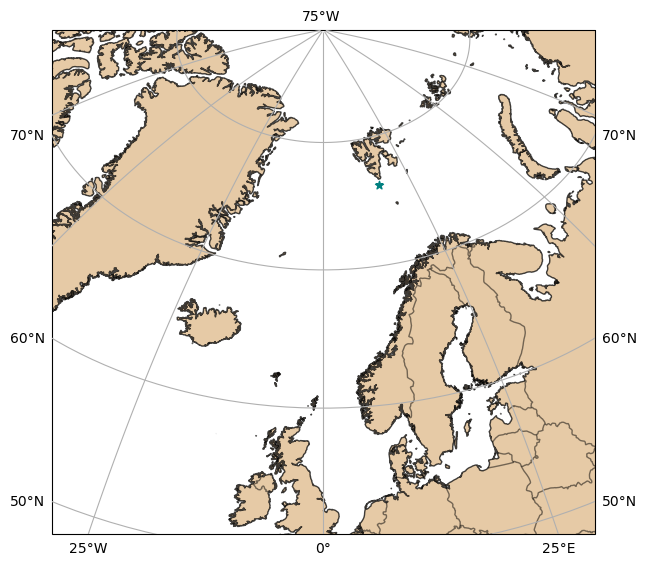

In [3]:
fig, ax = plot_SouthCape()

## Observasjoner

Det ligger data i en csv-fil her: <br />
/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/SouthCape/T_S_SouthCape.csv

Første tidspunkt er 13. april 2022, siste tidpunkt er 20 april 2023

Merk at dette datasettet ikke er kvalitetskontrollert på samme måte som Stasjon M. 
Det finnes en kolonne som heter error_flags, men verdien er konstant for hele måleserien. 

In [27]:
import pandas as pd
import datetime
csvfile = '/lustre/storeB/project/fou/hi/projects/NorEmso/Observations/moorings/SouthCape/T_S_SouthCape.csv'


# Dersom du ser på innholdet i filen ser du at den består av kolonner adskilt med komma. 
# Første linje er en header som beskriver innholdet i kolonnen. 

# FrameSync,DateTime_UTC,ensemble,Error_Flags,Temperature_C,Pressure_Decibar,Salinity_psu
names = ['timestamp', 'ensemble', 'ErrorFlags', 'Temperature', 'Pressure', 'Salinity']

# Første kolonne inneholder ikke noe nyttig informasjon, så den trenger vi ikke laste inn. 
# Angir dette ved å bruke argumentet usecols, og liste indeksene til de kolonnene vi ønsker å bruke (python teller fra 0)

parse = lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')                                          
                                           
df = pd.read_csv(csvfile, names = names,  header =1 , usecols=[1,2,3,4,5,6], infer_datetime_format=True, parse_dates={"Datetime" : ['timestamp']}, date_parser = parse )

# Vis de første 10 linjene av filen:
df.head(-10)

,Datetime,ensemble,ErrorFlags,Temperature,Pressure,Salinity
0,2022-04-13 07:37:01,2,20,1.6483,380.450,35.3752
1,2022-04-13 07:42:01,3,20,1.6596,380.469,35.2383
2,2022-04-13 07:47:01,4,20,1.6719,380.475,35.1603
3,2022-04-13 07:52:01,5,20,1.7019,380.487,35.1023
4,2022-04-13 07:57:01,6,20,1.7255,380.504,35.0643
...,...,...,...,...,...,...
107235,2023-04-20 15:52:01,107237,20,3.1083,-0.258,0.4985
107236,2023-04-20 15:57:01,107238,20,3.4999,-0.256,0.4920
107237,2023-04-20 16:02:01,107239,20,3.7982,-0.241,0.5265
107238,2023-04-20 16:07:01,107240,20,4.0536,-0.242,0.5536


### Beregne dyp fra trykk

Denne python-pakken har mange funksjoner som kan være nyttig når man jobber med
observasjoner: 
https://teos-10.github.io/GSW-Python/


In [37]:
import gsw
gsw.z_from_p?

/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in z_from_p
  result = getattr(ufunc, method)(*inputs, **kwargs)


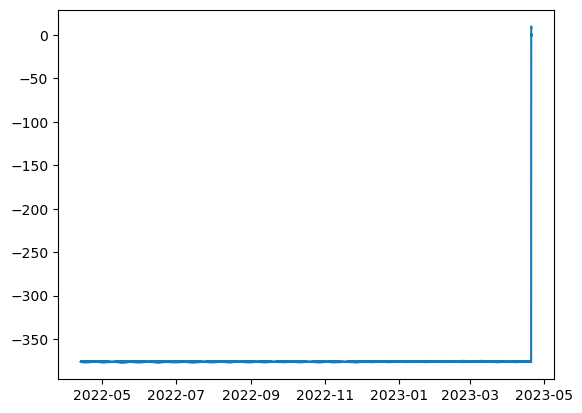

In [41]:
plt.plot(df.Datetime, gsw.z_from_p(df.Pressure, 76.107))

På slutten av tidsserien går dypet plutselig mot 0. Dette er antageligvis i forbindelse med at observatoriet blir hentet opp. Denne dele av tidsserien bør ikke brukes. 

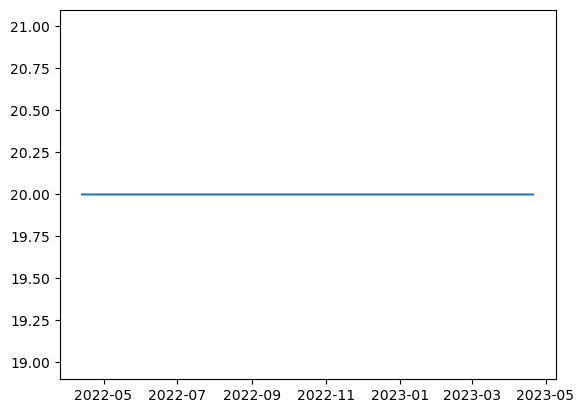